In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("score.csv")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [2]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [4]:
df.shape

(25, 2)

In [5]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [6]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [7]:
x=df.iloc[:,:-1]
x

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [8]:
y=df.iloc[:,-1]
y

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

Text(0.5, 1.0, 'hour-score scatter')

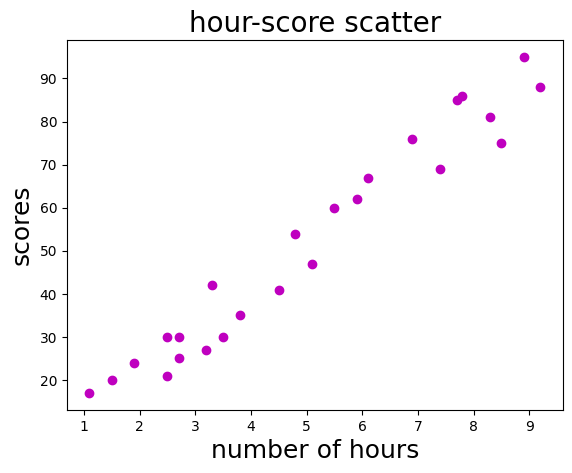

In [9]:
plt.scatter(x,y,color="m")
plt.xlabel("number of hours",fontsize=18)
plt.ylabel("scores",fontsize=18)
plt.title('hour-score scatter',fontsize=20)

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)
x_train

,Hours
4,3.5
2,3.2
20,2.7
6,9.2
7,5.5
22,3.8
1,5.1
16,2.5
0,2.5
15,8.9


In [11]:
x_test

,Hours
14,1.1
13,3.3
17,1.9
3,8.5
21,4.8
10,7.7
18,6.1
19,7.4


In [12]:
y_train

4     30
2     27
20    30
6     88
7     60
22    35
1     47
16    30
0     21
15    95
24    86
23    76
9     25
8     81
12    41
11    62
5     20
Name: Scores, dtype: int64

In [13]:
y_test

14    17
13    42
17    24
3     75
21    54
10    85
18    67
19    69
Name: Scores, dtype: int64

In [14]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([ 9.93952968, 32.84320126, 18.26813752, 86.97915227, 48.45934097,
       78.65054442, 61.99332873, 75.52731648])

In [15]:
print(model.predict([[6.3]]))

[64.07548069]


c:\Users\SHYAMA S\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'hours-score')

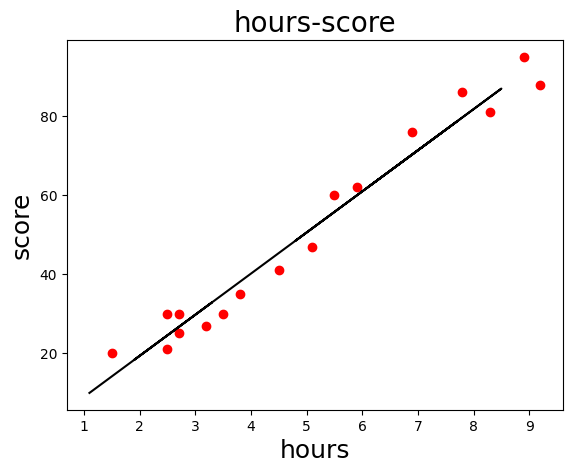

In [16]:
plt.scatter(x_train,y_train,color="r")
plt.plot(x_test,y_pred,color="k")
plt.xlabel("hours",fontsize=18)
plt.ylabel("score",fontsize=18)
plt.title("hours-score",fontsize=20)

In [17]:
print("slope is",model.coef_)

slope is [10.41075981]


In [18]:
print("constant is",model.intercept_)

constant is -1.5123061161277889


In [19]:
df1=pd.DataFrame({"actual value":y_test,"predicted value":y_pred,"difference":y_test-y_pred})
df1

,actual value,predicted value,difference
14,17,9.939530,7.060470
13,42,32.843201,9.156799
17,24,18.268138,5.731862
3,75,86.979152,-11.979152
21,54,48.459341,5.540659
10,85,78.650544,6.349456
18,67,61.993329,5.006671
19,69,75.527316,-6.527316


In [20]:
from sklearn.metrics import mean_absolute_error
MAE=mean_absolute_error(y_test,y_pred)
MAE

7.169048271425507

In [21]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE=mean_absolute_percentage_error(y_test,y_pred)
MAPE

0.17231499194888572

In [22]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(y_test,y_pred)
MSE

56.092330905646705

In [23]:
from sklearn.metrics import root_mean_squared_error
RMSE=root_mean_squared_error(y_test,y_pred)
RMSE

7.489481350911204

In [24]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.8933827573294114